In [3]:
import numpy as np
from skimage.io import imread
from skimage.transform import radon, iradon

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath',
    r'\usepackage{xcolor}',
    r'\renewcommand{\familydefault}{\sfdefault}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{graphicx}',
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{relsize}',
    r'\newcommand{\bigpi}{\scalebox{5}{\ensuremath{\pi}}}'
]

/home/xy4cm/anaconda3/envs/ds/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [4]:
I = imread('./figs/3gaussians.png').mean(2) / 128.
I = I[:, np.arange(219, -1, -1)]

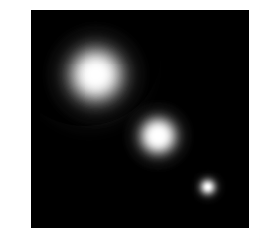

In [5]:
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
def f(X, rho):
    theta = np.array([np.cos(-(np.pi / 2.) - np.pi * rho / 180.),
                      np.sin(-(np.pi / 2.) - np.pi * rho / 180.)])
    return np.matmul(X, theta).squeeze()

In [7]:
gridx, gridy = np.meshgrid(np.linspace(-110, 110, num=100), np.linspace(-110, 110, num=100))
gridvec = np.concatenate((np.reshape(gridx, (10000, 1)), np.reshape(gridy, (10000, 1))), 1)

45


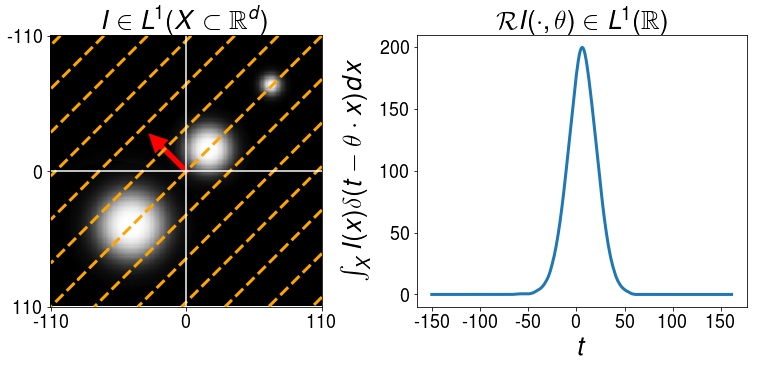

90


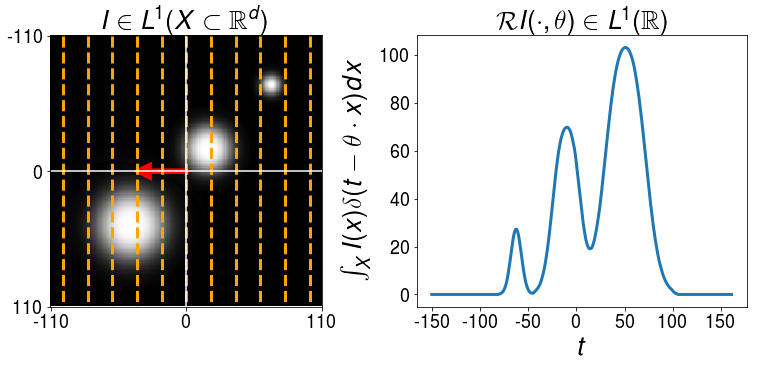

135


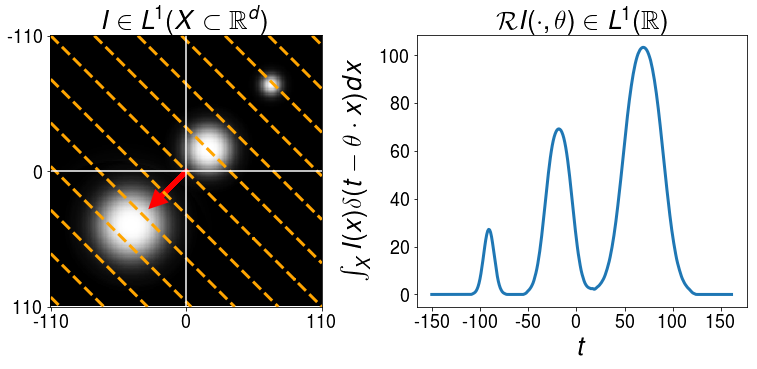

180


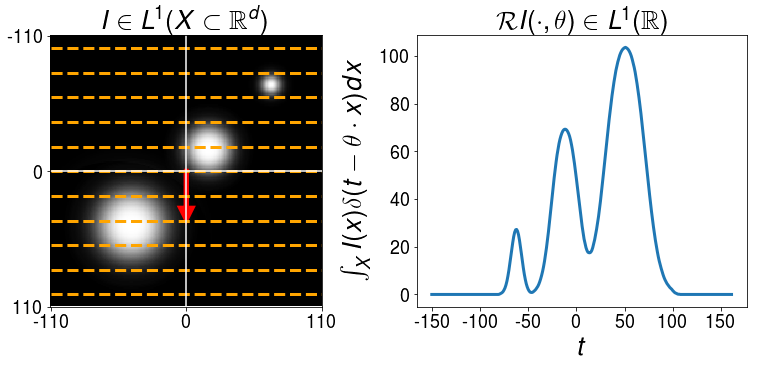

In [8]:
for n, theta in enumerate(np.arange(45, 181, 45)):
    print(theta)
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    Itemp = I.copy()
    Itemp = Itemp[np.arange(219, -1, -1), :]

    ax[0].imshow(Itemp, cmap='gray')

    # Plot x and y axis
    ax[0].plot([110, 110], [0, 220], '-', c='w')
    ax[0].plot([0, 220], [110, 110], '-', c='w')

    # Plot project lines
    CS = ax[0].contour(gridx + 110, gridy + 110, np.reshape(f(gridvec, theta), (100, 100))
                       , 12, colors="orange", linestyles="--", linewidths=3)

    # Plot the arrow
    l = 30
    ax[0].arrow(110, 110,
                l * np.cos(-(np.pi / 2.) - np.pi * theta / 180.),
                l * np.sin(-(np.pi / 2.) - np.pi * theta / 180.),
                color='red', capstyle='projecting',
                head_width=9, head_length=9, linewidth=5)

    # Disable ticks
    ax[0].set_xticks(np.linspace(0, 220, 3).astype('int'))
    ax[0].set_xticklabels([-110, 0, 110])
    ax[0].set_yticks(np.linspace(0, 220, 3).astype('int'))
    ax[0].set_yticklabels([-110, 0, 110])
    ax[0].set_title(r'$I\in L^1(X\subset \mathbb{R}^d)$', fontsize=26)

    # Labels
    ax[1].plot(radon(I, [theta], circle=False)[:, 0], linewidth=3)
    ax[1].set_xticks(np.arange(0, 312, 50).astype('int'))
    ax[1].set_xticklabels(np.arange(-150, 155, 50).astype('int'))
    for i in range(2):
        ax[i].tick_params(axis='x', which='major', labelsize=18)
        ax[i].tick_params(axis='y', which='major', labelsize=18)

        # Latex labels
    ax[1].set_ylabel(r'$\int_X I(x)\delta(t-\textcolor{red}{\theta}\cdot x)dx$', fontsize=26)
    ax[1].set_xlabel(r'$t$', fontsize=26)
    ax[1].set_title(r'$\mathcal{R}I(\cdot,\theta) \in L^1(\mathbb{R})$', fontsize=26)

    plt.show()